In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('redwinequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

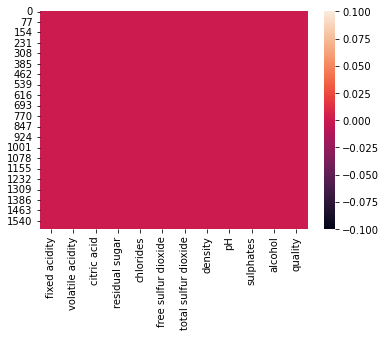

In [4]:
# Checking missing values
sns.heatmap(df.isnull())

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

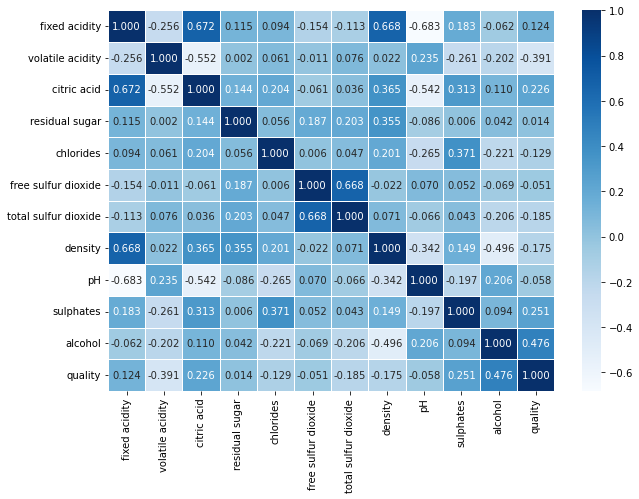

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='Blues',linewidth=0.5, annot=True,fmt='.3f')

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.shape

(1599, 12)

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variable is discrete and categorical in nature 

Quality score scale ranges from 3 to 8:
lowest is 3 and highest is 8.

In [10]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Quality has most concentration in 5, 6, 7 categories

In [11]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Skewness observed:


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

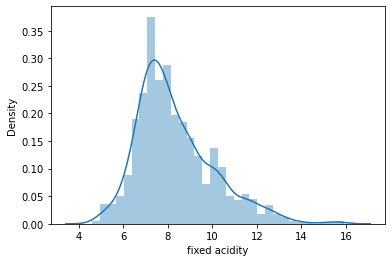

In [12]:
sns.distplot(df["fixed acidity"])

The data is not normalised. The building blocks are out of normalized curves

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

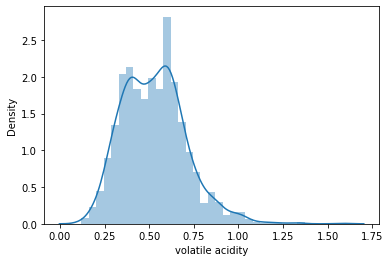

In [13]:
sns.distplot(df["volatile acidity"])

The data is not normalised. The building blocks are out of normalized curves

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

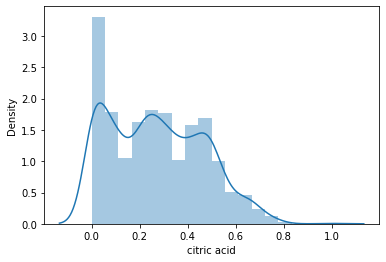

In [14]:
sns.distplot(df["citric acid"])

The data is not normalised. The building blocks are out of normalized curves

The normalized distribution shows that the data is skewed

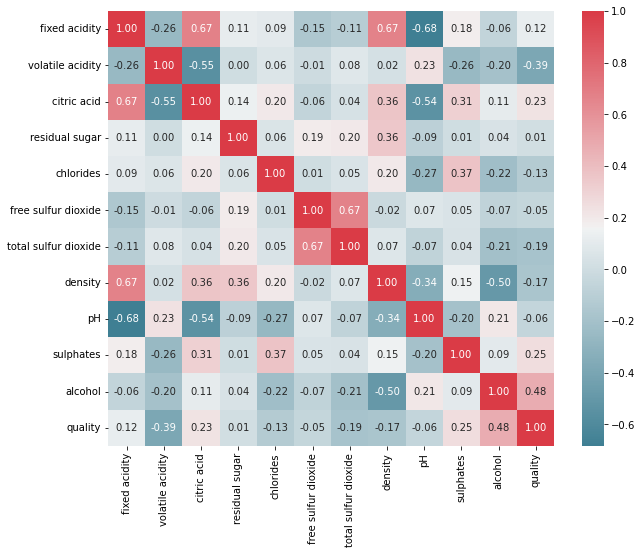

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='.2f')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

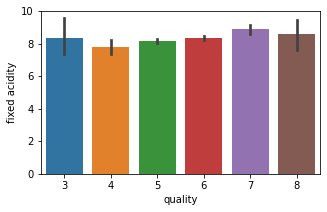

In [16]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

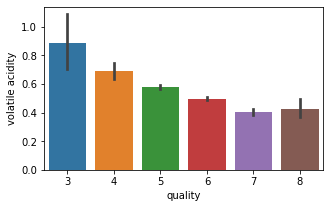

In [17]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

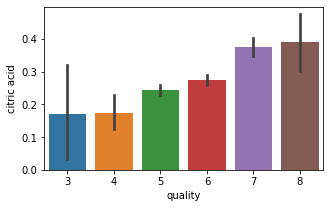

In [18]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

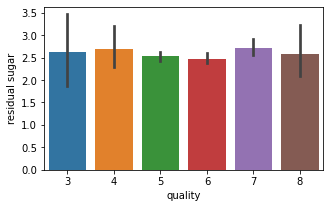

In [19]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

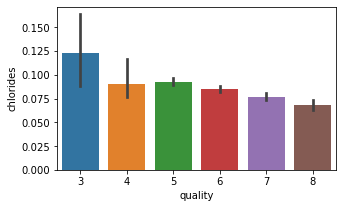

In [20]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

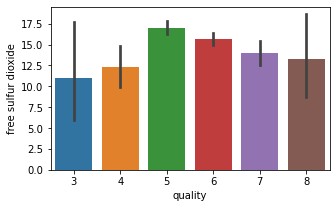

In [21]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

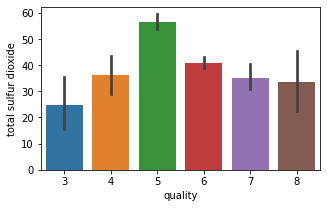

In [22]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

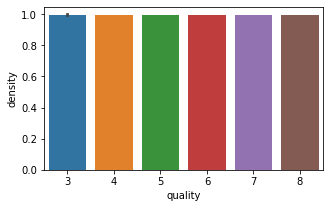

In [23]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'density', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

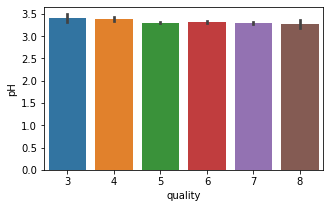

In [24]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'pH', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

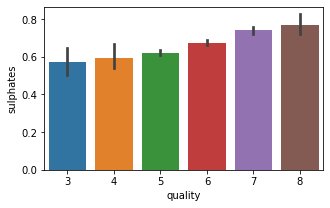

In [25]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

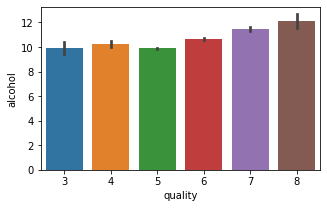

In [26]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Our aim is to remove all the missing values present in the data if any, and dropping off the negatively correlated values.

Maximum Correlation wrt quality: alcohol, sulphates, pH, residual sugar, fixed acidity


Minimum correlation wrt quality: volatile acidity, total, sulfur dioxide, density

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

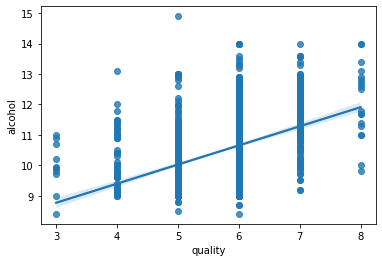

In [27]:
# ploting regression plot
sns.regplot(x='quality',y='alcohol',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

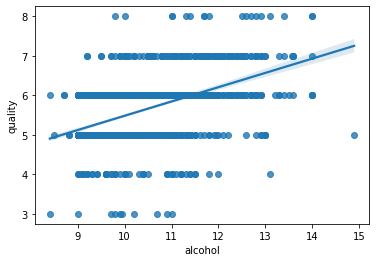

In [28]:
sns.regplot(x='alcohol',y='quality',data=df)

In [29]:
# df.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis=1, inplace=True)

In [30]:
# df.head()

In [31]:
# df.shape

In [32]:
# Removing Outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [33]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [34]:
df_new = df[(z<3).all(axis=1)]
df_new



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Shows cleaned data without the outliers  

In [35]:
df_new.shape

(1451, 12)

In [36]:
Data_loss=((1599-1492)/1599)*100
Data_loss

6.6916823014384

Data loss is in acceptable range below 10% i.e., 6.69%

In [37]:
# dividing the features into independent and dependent features


In [38]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

# Separating the columns into features(independent variable) and target(dependent variable) so that our model can learn

In [40]:
# train test split

In [41]:
# Scaling the data using Min-Max Scaler

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
505,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5
1317,9.9,0.44,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3
1383,8.0,0.60,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9
933,7.4,0.61,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8
...,...,...,...,...,...,...,...,...,...,...,...
525,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9
343,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
553,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5
594,7.9,0.72,0.17,2.6,0.096,20.0,38.0,0.99780,3.40,0.53,9.5


In [44]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.40
1511,7.1,0.690,0.04,2.1,0.068,19.0,27.0,0.99712,3.44,0.67,9.80
175,6.9,0.500,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.50
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.40
1344,11.5,0.420,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.00
...,...,...,...,...,...,...,...,...,...,...,...
527,7.0,0.380,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.40
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.00
425,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.30
1515,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.25


In [45]:
# standardizing the  dataset
scaler=StandardScaler()

In [46]:
# In layman's terms, fit_transform means to do some calculation and then do transformation 
# (say calculating the means of columns from some data and then replacing the missing values).
# So for training set, you need to both calculate and do transformation.

# But for testing set, Machine learning applies prediction based on what was learned during 
# the training set and so it doesn't need to calculate, it just performs the transformation.

In [47]:
x_train=scaler.fit_transform(x_train)

In [48]:
x_test=scaler.transform(x_test)

In [49]:
x_train

array([[ 1.1632067 , -0.20228861,  1.90270445, ..., -1.10923859,
         1.05928496,  2.03641939],
       [ 0.97900015, -0.49764176,  1.0176375 , ..., -0.96735608,
         0.36474458,  1.44858286],
       [-0.24904349, -0.91113616, -0.17980603, ..., -0.2579435 ,
         0.21040227, -1.09870877],
       ...,
       [-2.02970677,  3.04659597, -0.12774327, ...,  3.00535435,
        -0.1754535 ,  1.05669184],
       [-0.24904349,  1.15633585, -0.4921826 , ...,  0.59335159,
        -0.86999388, -0.90276326],
       [ 0.4877827 , -1.08834805,  0.80938645, ..., -0.96735608,
        -0.71565157,  0.95871909]])

In [50]:
y_train

505     7
1317    6
263     5
1383    5
933     5
       ..
525     5
343     6
553     5
594     5
1322    5
Name: quality, Length: 1305, dtype: int64

# Model Training

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regression=LinearRegression()

In [53]:
regression.fit(x_train, y_train)

LinearRegression()

In [54]:
print(regression.coef_)

[ 0.04991802 -0.1278945  -0.04370778  0.00818316 -0.01518347  0.03581647
 -0.1101016  -0.05046657 -0.0772359   0.18888321  0.27821074]


In [55]:
print(regression.intercept_)

5.664367816091954


In [56]:
# on which paramenter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [57]:
###prediction of the data

In [58]:
reg_pred=regression.predict(x_test)
reg_pred

array([6.29591831, 5.42933882, 5.63239141, 5.14492258, 5.9239206 ,
       5.79615495, 6.19600083, 5.70114608, 6.51441578, 5.2149474 ,
       6.10539386, 5.37333222, 5.07769493, 5.94027844, 6.02453744,
       5.22142922, 5.86224062, 5.17153788, 5.75717568, 6.20103957,
       5.57059631, 5.43929419, 5.23311421, 6.62851185, 6.1545652 ,
       5.56968233, 5.22515671, 5.25583905, 5.67400369, 5.76493397,
       5.79434782, 5.79434782, 5.85640021, 5.68178764, 5.69960989,
       5.89171987, 5.43134818, 6.4007708 , 6.53244402, 5.94168789,
       5.37440449, 5.65321283, 5.0201632 , 5.07455327, 5.22478565,
       5.84965519, 5.0146316 , 5.62452787, 4.99508003, 5.80848048,
       6.18241381, 5.21235388, 5.25273427, 5.14635622, 5.18425753,
       5.39018378, 5.82753881, 5.69397187, 6.28622433, 5.83728791,
       5.2410806 , 5.91848741, 5.62418561, 5.81069028, 5.21634104,
       5.72293407, 6.11006134, 5.93213077, 5.10250233, 5.97414682,
       6.48731481, 5.79064772, 6.11515568, 5.40212235, 6.18923

In [59]:
# plot a scatter plot for the prediction

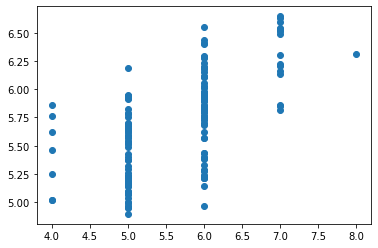

In [60]:
plt.scatter(y_test,reg_pred)

<AxesSubplot:xlabel='quality'>

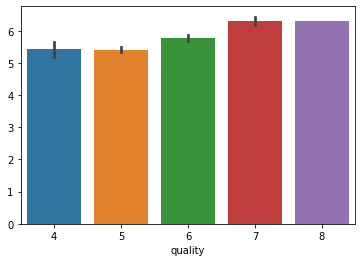

In [61]:
sns.barplot(x = y_test, y = reg_pred,data=df)


In [62]:
# the y axis value of reg_pred is linear to X axis Y_test, making our model is prediction some amount of good information

In [63]:
# predictions with residuals
residuals=y_test-reg_pred

In [64]:
residuals

1292   -0.295918
1511   -0.429339
175    -0.632391
688    -0.144923
1344   -0.923921
          ...   
527    -0.012528
1164   -0.489670
425     1.184068
1515    1.033496
279     1.139615
Name: quality, Length: 146, dtype: float64

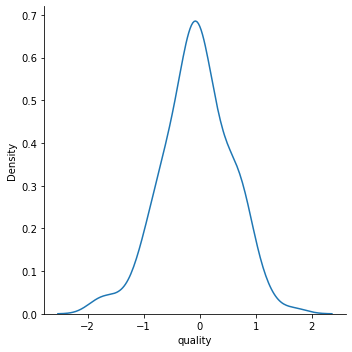

In [65]:
# ploting the residuals
sns.displot(residuals,kind='kde')

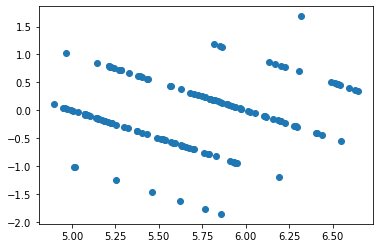

In [66]:
# scatter plot wrt predcitions and residuals

plt.scatter(reg_pred,residuals)

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


0.4744782056057624
0.3748605970309027
0.6122586030681012


# R2 and adjusted R2--performance metrics

In [68]:
# R2
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.3674375802477261

In [69]:
# adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.31551081444716633

In [70]:
# the adjusted R2 will be less that R2 . If this happens it means that out model is working well

In [71]:
# model training
# random forest classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [72]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
# model evaluation

In [74]:
# now we will find the accuracy score

In [75]:
# accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [76]:
print('accuracy',test_data_accuracy)

accuracy 0.7397260273972602
